# Work Scheduling problem

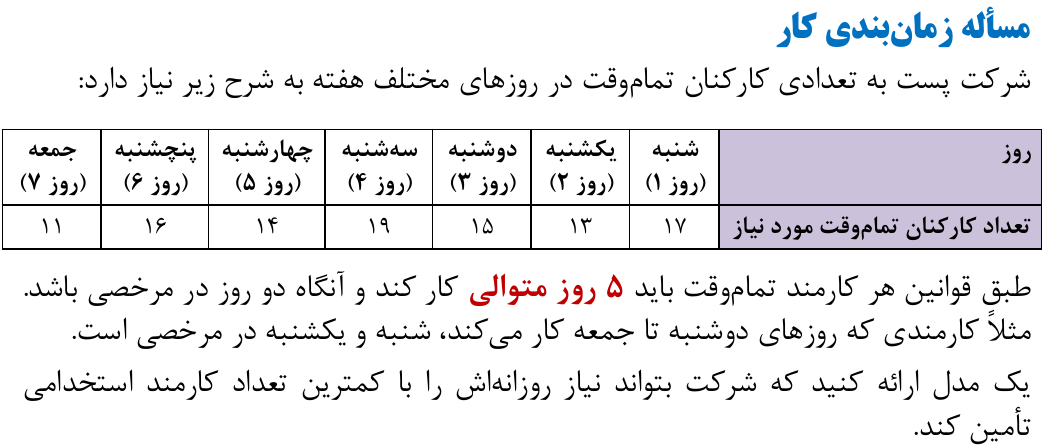

## Answer

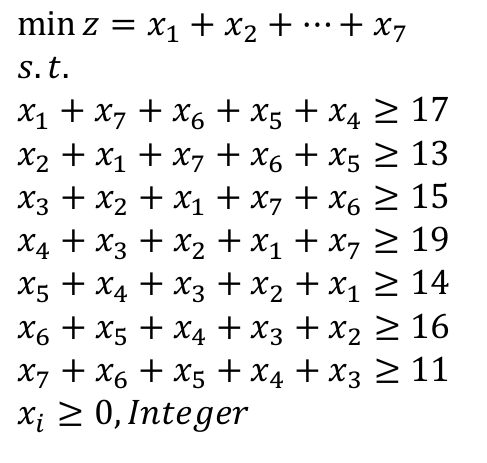

now we convert this rules to this sigma

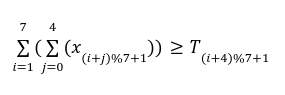

## Implementation

In [94]:
# import pyomo
import pyomo.environ as pyo
import math

In [95]:
# Create concenterate model 
model = pyo.ConcreteModel()
# define sets for sigma notation
model.iset=pyo.Set(initialize=[i for i in range(1,8)])
model.jset=pyo.Set(initialize=[j for j in range(5)])

In [96]:
# define rule bound for x
def rule_bound_x(model,i):
    return (0,math.inf)

In [97]:
# define variables
model.x=pyo.Var(model.iset,domain = pyo.NonNegativeIntegers,bounds=rule_bound_x)

In [98]:
# define obj rule

def obj_rule(model):
    return sum(model.x[i] for i in model.iset)
model.obj=pyo.Objective(rule=obj_rule,sense = pyo.minimize)


In [99]:

# define cost dics for constraint
costs = {
    1:17,
    2:13,
    3:15,
    4:19,
    5:14,
    6:16,
    7:11
}
def const1_rule(model,i):
    return costs[(i+4)%7+1] <= sum(model.x[(i+j)%7+1] for j in model.jset) 
model.const1=pyo.Constraint(model.iset,rule=const1_rule)     
for i in model.iset:
   print(costs[(i+4)%7+1] <= sum(model.x[(i+j)%7+1] for j in model.jset) )
    

    

16  <=  x[2] + x[3] + x[4] + x[5] + x[6]
11  <=  x[3] + x[4] + x[5] + x[6] + x[7]
17  <=  x[4] + x[5] + x[6] + x[7] + x[1]
13  <=  x[5] + x[6] + x[7] + x[1] + x[2]
15  <=  x[6] + x[7] + x[1] + x[2] + x[3]
19  <=  x[7] + x[1] + x[2] + x[3] + x[4]
14  <=  x[1] + x[2] + x[3] + x[4] + x[5]


In [100]:
result=pyo.SolverFactory('glpk').solve(model,'glpk',keepfiles=True,tee=True)
# print (str(result.solver))
# print (str(result.solver.status))
# print (str(result.solver.termination_condition))
model.display()

Solver log file: '/tmp/tmpcpmsy9go.glpk.log'
Solver solution file: '/tmp/tmp007j82nm.glpk.raw'
Solver problem files: ('/tmp/tmp0fq3avx9.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmp007j82nm.glpk.raw --wglp /tmp/tmp4iutnxq9.glpk.glp --cpxlp
 /tmp/tmp0fq3avx9.pyomo.lp
Reading problem data from '/tmp/tmp0fq3avx9.pyomo.lp'...
8 rows, 8 columns, 36 non-zeros
7 integer variables, none of which are binary
90 lines were read
Writing problem data to '/tmp/tmp4iutnxq9.glpk.glp'...
78 lines were written
GLPK Integer Optimizer, v4.65
8 rows, 8 columns, 36 non-zeros
7 integer variables, none of which are binary
Preprocessing...
7 rows, 7 columns, 35 non-zeros
7 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 7
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
7 rows,

# Financial problem


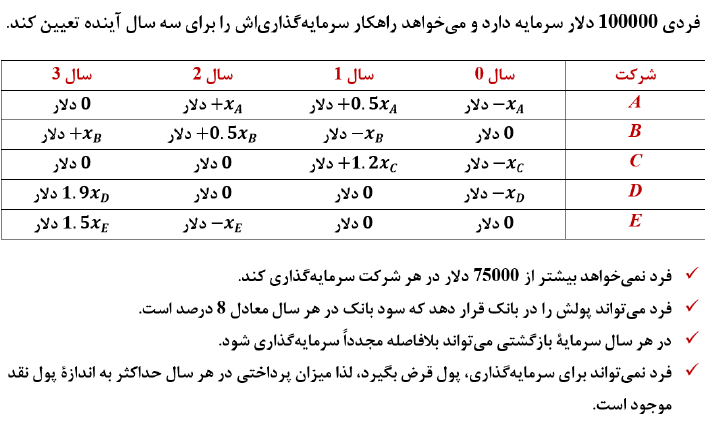
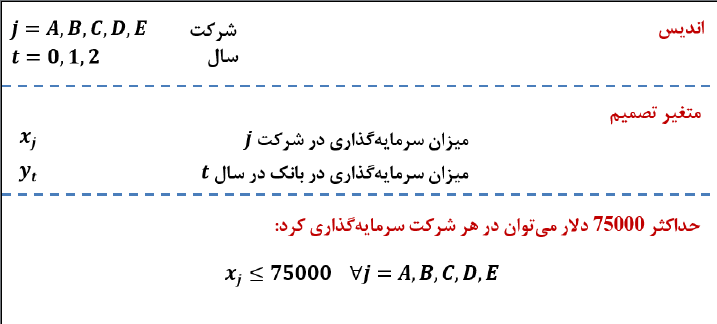

## Answer

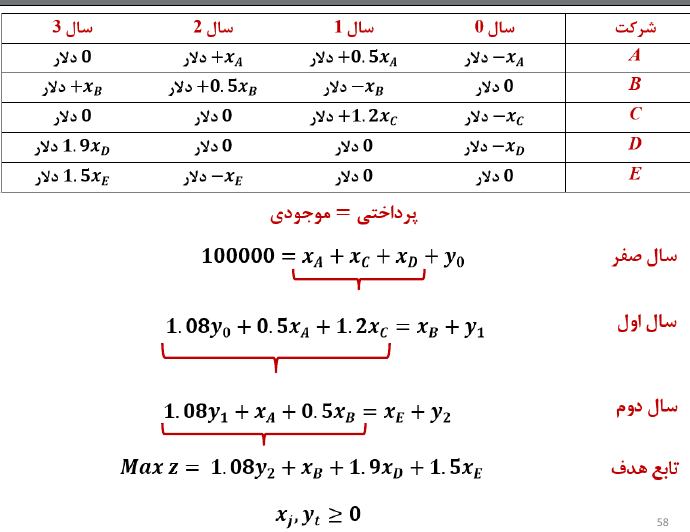

## implementation 


In [103]:
# Create concenterate model 
model = pyo.ConcreteModel()
bank_interest=0.08
# define sets for sigma notation
model.iset=pyo.Set(initialize=[i for i in range(5)])
model.kset=pyo.Set(initialize=[i for i in range(3)])
# define rule bound for x
def rule_bound_x(model,i):
    return (0,75000)
def rule_bound_y(model,k):
    return (0,math.inf)
model.x=pyo.Var(model.iset,domain = pyo.NonNegativeIntegers,bounds=rule_bound_x)
model.y=pyo.Var(model.kset,domain = pyo.NonNegativeIntegers,bounds=rule_bound_y)

In [104]:
# define obj rule

def obj_rule(model):
    return (1+bank_interest)*model.y[2]+model.x[1]+1.9*model.x[3]+1.5*model.x[4]
model.obj=pyo.Objective(rule=obj_rule,sense = pyo.maximize)


In [105]:
def const1_rule(model):
    return 100000 == model.x[0]+model.x[2]+model.x[3]+model.y[0]
model.const1=pyo.Constraint(rule=const1_rule)     
def const2_rule(model):
    return model.x[1]+model.y[1] == 0.5*model.x[0]+1.2*model.x[2]+(1+bank_interest)*model.y[0]
model.const2=pyo.Constraint(rule=const2_rule) 
def const3_rule(model):
    return  model.x[4]+model.y[2] == model.x[0]+0.5*model.x[1]+(1+bank_interest)*model.y[1]
model.const3=pyo.Constraint(rule=const3_rule) 

In [106]:
result=pyo.SolverFactory('glpk').solve(model,'glpk',keepfiles=True,tee=True)
# print (str(result.solver))
# print (str(result.solver.status))
# print (str(result.solver.termination_condition))
model.display()

Solver log file: '/tmp/tmp4zkg45vi.glpk.log'
Solver solution file: '/tmp/tmpxnea55cq.glpk.raw'
Solver problem files: ('/tmp/tmp4ecc29ui.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpxnea55cq.glpk.raw --wglp /tmp/tmpb3vihywl.glpk.glp --cpxlp
 /tmp/tmp4ecc29ui.pyomo.lp
Reading problem data from '/tmp/tmp4ecc29ui.pyomo.lp'...
4 rows, 9 columns, 15 non-zeros
8 integer variables, none of which are binary
56 lines were read
Writing problem data to '/tmp/tmpb3vihywl.glpk.glp'...
46 lines were written
GLPK Integer Optimizer, v4.65
4 rows, 9 columns, 15 non-zeros
8 integer variables, none of which are binary
Preprocessing...
3 rows, 8 columns, 14 non-zeros
8 integer variables, none of which are binary
Scaling...
 A: min|aij| =  5.000e-01  max|aij| =  1.200e+00  ratio =  2.400e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
3 rows,

# Dual problem 


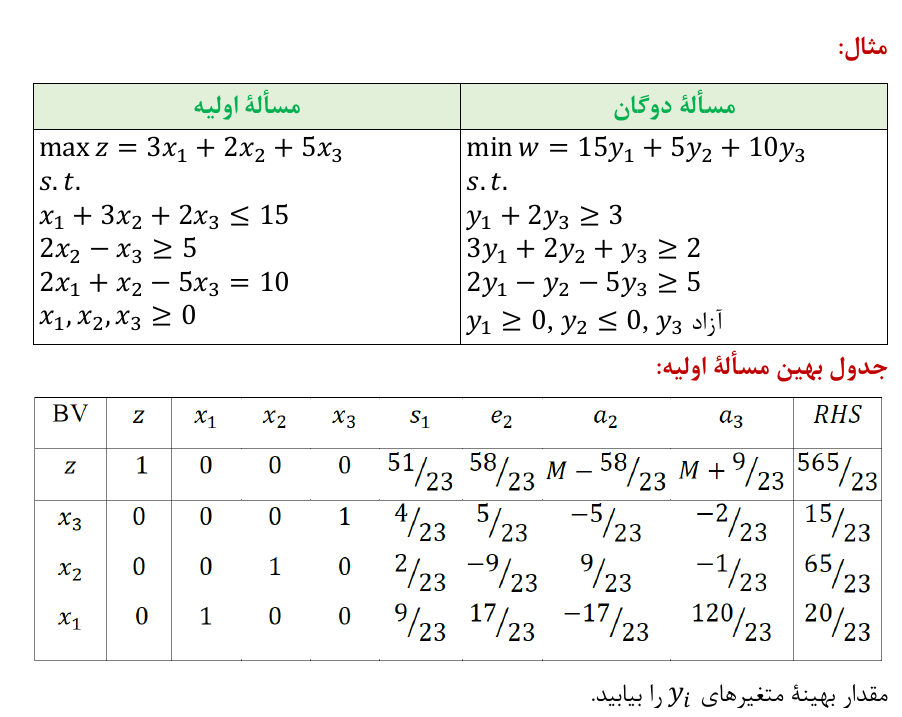

## Implementation

In [134]:
# Create concenterate model 
model = pyo.ConcreteModel()
# define sets for sigma notation
model.iset=pyo.Set(initialize=[i for i in range(1,4)])
# define rule bound for x
data_obj={
    1:3,
    2:2,
    3:5
}
data_const1={
    1:1,
    2:3,
    3:2
}
data_const2={
    1:0,
    2:2,
    3:-1
}
data_const3={
    1:2,
    2:1,
    3:-5
}

def rule_bound_x(model,i):
    return (0,math.inf)
model.a=pyo.Param(model.iset,initialize=data_obj)
model.b=pyo.Param(model.iset,initialize=data_const1)
model.c=pyo.Param(model.iset,initialize=data_const2)
model.d=pyo.Param(model.iset,initialize=data_const3)
model.x=pyo.Var(model.iset,domain = pyo.NonNegativeReals,bounds=rule_bound_x)

In [135]:
# define obj rule

def obj_rule(model):
    return sum(model.a[i]*model.x[i] for i in model.iset)
model.obj=pyo.Objective(rule=obj_rule,sense = pyo.maximize)


In [136]:
# check for duals
model.dual=pyo.Suffix(direction=pyo.Suffix.IMPORT)

In [137]:
def const1_rule(model):
    return  sum(model.b[i]*model.x[i] for i in model.iset)<=15
model.const1=pyo.Constraint(rule=const1_rule)     
def const2_rule(model):
    return 5<=sum(model.c[i]*model.x[i] for i in model.iset)
model.const2=pyo.Constraint(rule=const2_rule) 
def const3_rule(model):
    return  sum(model.d[i]*model.x[i] for i in model.iset) ==10
model.const3=pyo.Constraint(rule=const3_rule) 

In [138]:
result=pyo.SolverFactory('glpk').solve(model,'glpk',keepfiles=True,tee=True)
# print (str(result.solver))
# print (str(result.solver.status))
# print (str(result.solver.termination_condition))
model.display()
print("y1*",model.dual[model.const1])
print("y2*",model.dual[model.const2])
print("y3*",model.dual[model.const3])


Solver log file: '/tmp/tmpeiotgs6k.glpk.log'
Solver solution file: '/tmp/tmp11ri5pdv.glpk.raw'
Solver problem files: ('/tmp/tmpnufb3g58.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmp11ri5pdv.glpk.raw --wglp /tmp/tmpzte791on.glpk.glp --cpxlp
 /tmp/tmpnufb3g58.pyomo.lp
Reading problem data from '/tmp/tmpnufb3g58.pyomo.lp'...
4 rows, 4 columns, 9 non-zeros
35 lines were read
Writing problem data to '/tmp/tmpzte791on.glpk.glp'...
27 lines were written
GLPK Simplex Optimizer, v4.65
4 rows, 4 columns, 9 non-zeros
Preprocessing...
3 rows, 3 columns, 8 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+00  ratio =  5.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
      0: obj =  -1.000000000e+01 inf =   5.000e+00 (2)
      2: obj =   1.625000000e+01 inf =   0.000e+00 (0)
*     3: obj =   2.456521739e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:  